# Use of NetworkX algorithms

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/frannerin/AlloViz/HEAD?labpath=notebooks%2Fnetworkx.ipynb)

In [13]:
import AlloViz

## System setup

We are going to use the structure and simulations of GPCR Beta-2 adrenergic receptor (B2AR) in the inactive form bound to carazolol (inverse agonist, [160](https://submission.gpcrmd.org/view/160/)). The network will be built with `PyInteraph2_Contacts`, which measures the distance-based residue contacts along the trajectory, and will be filtered with the `Spatially_distant` filter to leave out residue pairs too close to each other, with a minimum distance of 20 Angstroms.

In [14]:
system = AlloViz.Protein(pdb="data/160/protein.pdb",
                         trajs="data/160/traj_1.xtc",
                         path="data/160")

/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [15]:
system.calculate(pkgs="PyInteraph2_Contacts")

PyInteraph2_Contacts
adding raw data of PyInteraph2_Contacts for data/160/protein.pdb:  ['data/160/data/PyInteraph2_Contacts/raw/1.pq']


In [16]:
system.filter(filterings="Spatially_distant", Interresidue_distance=20)
# the same as doing: system.PyInteraph2_Contacts.filter(filterings="Spatially_distant", Interresidue_distance=20)

Filtered networks are stored as NetworkX Graph objects and can be passed to NetworkX analysis functions.

In [17]:
system.PyInteraph2_Contacts.Spatially_distant.graphs

{'weight': <networkx.classes.graph.Graph at 0x7f4f985fafd0>}

In [18]:
graph = system.PyInteraph2_Contacts.Spatially_distant.graphs["weight"]

## NetworkX

To use NetworkX's functions, we must specify that the edge weights are stored with the name "weight". For example, if we want to use NetworkX's shortest paths analysis:

In [19]:
from networkx.algorithms.shortest_paths.generic import shortest_path

In [20]:
paths = shortest_path(graph, weight="weight")
paths

{'ALA:134': {'ALA:134': ['ALA:134'],
  'GLY:257': ['ALA:134', 'GLY:257'],
  'PRO:138': ['ALA:134', 'GLY:257', 'PRO:138'],
  'PHE:139': ['ALA:134', 'GLY:257', 'PHE:139'],
  'TYR:141': ['ALA:134', 'GLY:257', 'TYR:141'],
  'GLN:142': ['ALA:134', 'GLY:257', 'GLN:142'],
  'SER:143': ['ALA:134', 'GLY:257', 'SER:143'],
  'GLN:229': ['ALA:134', 'GLY:257', 'GLN:229'],
  'LEU:258': ['ALA:134', 'GLY:257', 'PHE:139', 'LEU:258'],
  'ARG:259': ['ALA:134', 'GLY:257', 'GLN:142', 'ARG:259'],
  'GLY:238': ['ALA:134', 'GLY:257', 'PRO:138', 'GLY:238'],
  'GLU:225': ['ALA:134', 'GLY:257', 'GLN:142', 'ARG:259', 'GLU:225'],
  'VAL:242': ['ALA:134', 'GLY:257', 'GLN:142', 'ARG:259', 'VAL:242'],
  'GLN:224': ['ALA:134',
   'GLY:257',
   'GLN:142',
   'ARG:259',
   'VAL:242',
   'GLN:224'],
  'ARG:228': ['ALA:134',
   'GLY:257',
   'GLN:142',
   'ARG:259',
   'VAL:242',
   'ARG:228'],
  'GLN:231': ['ALA:134',
   'GLY:257',
   'GLN:142',
   'ARG:259',
   'VAL:242',
   'GLN:231'],
  'HIS:269': ['ALA:134',
   'GLY:

## Alternative NetworkX's centrality analyses and visualization

AlloViz's `analyze` method allows to use any NetworkX analysis that returns a list of node values or edge values (e.g., node or edge centrality analyses), and its posterior visualization with the `view` method.

The absolute Python import of the analysis function with a custom short name for it must be passed as a dictionary to the `analyze` method. The default node_dict and edge_dict (with "btw" and "cfb") are already part of the Analysis module:

In [21]:
AlloViz.AlloViz.Analysis.nodes_dict

{'btw': 'networkx.algorithms.centrality.betweenness_centrality',
 'cfb': 'networkx.algorithms.centrality.current_flow_betweenness_centrality'}

Therefore, a new centrality analysis function for the nodes (e.g., [load centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.load_centrality.html)) can be used with:

In [22]:
system.analyze(elements="nodes", metrics="load", nodes_dict={"load": "networkx.algorithms.centrality.load_centrality"})

adding analyzed nodes <AlloViz.Wrappers.PyInteraph2_w.PyInteraph2_Contacts object at 0x7f4f985fa460> Spatially_distant data of for data/160/protein.pdb


The load centrality of a node is the fraction of all shortest paths that pass through that node. The results can be visualized as a usual:

/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


NGLWidget()

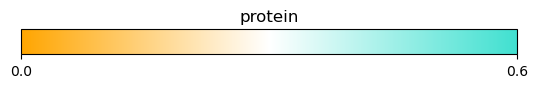

In [23]:
system.view("PyInteraph2_Contacts", "load", "Spatially_distant", "nodes")